In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv(r'E:\Udemy\Machine Learning A-Z\Part 6 - Reinforcement Learning\Section 33 - Thompson Sampling\Ads_CTR_Optimisation.csv')


In [4]:
# Thompson Algo

import random
N = 10000
d = 10
number_of_rewards_0 = [0] * d
number_of_rewards_1 = [0] * d
ad_selected = []
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ad_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

print(total_reward)


2602


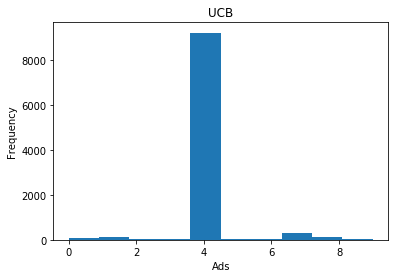

In [23]:
# Visualising results

plt.hist(ad_selected)
plt.title('UCB')
plt.xlabel('Ads')
plt.ylabel('Frequency')
plt.show()